In [464]:
import pandas as pd
import numpy as np
from math import floor

import matplotlib.pyplot as plt

from sklearn import svm

# Preparing data

In [499]:
df = pd.read_csv('web-page-phishing.csv')

xdf = df[df.columns[:-1]]
ydf = df[df.columns[-1]]

ydf = ydf.replace(0, -1)

X = xdf.to_numpy()
Y = ydf.to_numpy()

# Custom Train Test Split

In [477]:
def train_test_split(x, y, test_size):
    # generate random order for spliting
    order = np.arange(x.shape[0])
    np.random.shuffle(order)

    # calculate size that needed for test
    num_test_size = floor(x.shape[0] * test_size) 
    
    # assign data to each array by random order
    x_test = x[order[:num_test_size], :x.shape[1]]
    x_train = x[order[num_test_size:], :x.shape[1]]

    y_test = y[order[:num_test_size]]
    y_train = y[order[num_test_size:]]

    return x_train, x_test, y_train, y_test

In [576]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Model based line

In [503]:
#based line
model = svm.SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8687984011991007

# Custom SVM classifier

### using SVM in empirical risk minimization term and use subgradient to minimize the loss

In [577]:
class SVM:
    def __init__(self, d, lamda = 0, slack = 0.2, learning_rate = 0.001, num_epochs = 1000):
        self.w = np.zeros(d)
        self.b = 0
        self.lamda = lamda
        self.slack = slack
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.losses = []
        self.train_accuracy = []

    def fit(self, x_train, y_train):
        for epoch in range(self.num_epochs):
            # Compute predictions and hinge loss
            y_preds = np.dot(x_train, self.w) + self.b
            
            hinge_losses = np.maximum(0, 1 - self.slack - (y_preds * y_train))

            # Compute total loss and average loss
            loss = np.sum(hinge_losses)
            avg_loss = (loss / len(x_train)) + (self.lamda * np.dot(self.w, self.w))

            # Store the average loss in the list
            self.losses.append(avg_loss)
            self.train_accuracy.append(self.score(x_train, y_train))

            print('Epoch:', epoch+1, 'Loss:', avg_loss)

            # Update subgradient
            mask = (hinge_losses > 0 + self.slack)
            gradient_w = -np.dot(mask * y_train, x_train) / len(x_train) + self.lamda * self.w
            gradient_b = -np.sum(mask * y_train) / len(x_train)

            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b
            
        self.__plot_loss()

    def __plot_loss(self):
        plt.plot(self.losses, label='Training Loss')
        plt.plot(self.train_accuracy, label='Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Metrics')
        plt.title('Training Result')
        plt.legend()
        plt.show()

    def predict(self, x_test):
        return np.sign(np.dot(x_test, self.w) + self.b)

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        test_accuracy = np.mean(y_pred == y_test)
        return(test_accuracy)
        
    

# Train data with custom SVM

Epoch: 1 Loss: 0.8
Epoch: 2 Loss: 0.7635774598936506
Epoch: 3 Loss: 0.7689097374224202
Epoch: 4 Loss: 0.7601565555356334
Epoch: 5 Loss: 0.7629224183619615
Epoch: 6 Loss: 0.7597257473096224
Epoch: 7 Loss: 0.7602420031703704
Epoch: 8 Loss: 0.7585103820010549
Epoch: 9 Loss: 0.7582744588188753
Epoch: 10 Loss: 0.7571383250232113
Epoch: 11 Loss: 0.7565199079522256
Epoch: 12 Loss: 0.7555861990007765
Epoch: 13 Loss: 0.7547786163996449
Epoch: 14 Loss: 0.7539476136383172
Epoch: 15 Loss: 0.7531592567645937
Epoch: 16 Loss: 0.7523465748069146
Epoch: 17 Loss: 0.7515320127308948
Epoch: 18 Loss: 0.7506706680311225
Epoch: 19 Loss: 0.7499075771524785
Epoch: 20 Loss: 0.7490639931070918
Epoch: 21 Loss: 0.7482508822413639
Epoch: 22 Loss: 0.7473546634795143
Epoch: 23 Loss: 0.7466756370660173
Epoch: 24 Loss: 0.7456823463519703
Epoch: 25 Loss: 0.7450600844177786
Epoch: 26 Loss: 0.7440680288461488
Epoch: 27 Loss: 0.7433186316943422
Epoch: 28 Loss: 0.7425085086363007
Epoch: 29 Loss: 0.7416866963203769
Epoch: 30

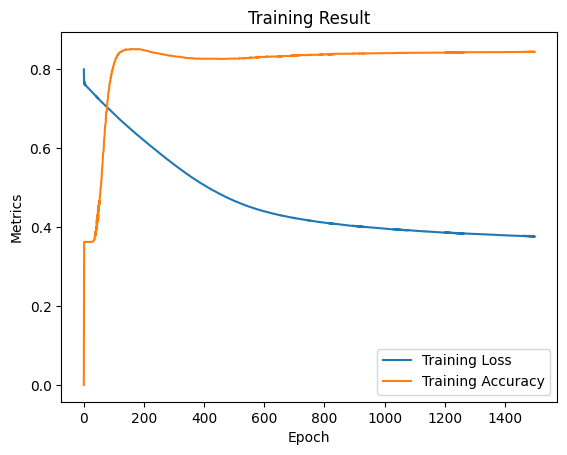

In [578]:
d = x_train.shape[1]
model = SVM(d, lamda=0.1, slack=0.2, learning_rate=0.001, num_epochs=1500)
model.fit(x_train, y_train)

# Performance

In [572]:
print('Training accuracy', model.score(x_train, y_train))
print('Testing accuracy', model.score(x_test, y_test))

Training accuracy 0.8445204966151233
Testing accuracy 0.8436172870347239
